<a href="https://colab.research.google.com/github/JPatoDiaz/riesgo-relativo-banca/blob/main/Outliers-Imputaci%C3%B3nDatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Outliers - Regla de Tukey


Llamar datos loans_ detail

In [ ]:
import pandas as pd
from google.colab import auth
from google.cloud import bigquery
from IPython.display import display

# Autenticación con Google Cloud
auth.authenticate_user()

# Configurar el cliente de BigQuery
project_id = "proyecto03-408116"
client = bigquery.Client(project=project_id)

# Query para obtener datos de BigQuery
query_relative_risk = """
SELECT *
FROM `relative_risk.loans_detail`
"""

# Ejecutar la consulta y cargar los resultados en un DataFrame
df_relative_risk = client.query(query_relative_risk).to_dataframe()

# Mostrar la tabla
display(df_relative_risk)


,user_id,more_90_days_overdue,using_lines_not_secured_personal_assets,number_times_delayed_payment_loan_30_59_days,debt_ratio,number_times_delayed_payment_loan_60_89_days
0,1,0,0.667083,0,0.153112,0
1,2,0,0.007093,0,0.148800,0
2,3,0,0.091213,0,0.351635,1
3,4,0,0.112680,0,0.065959,0
4,5,0,0.323985,0,0.352151,0
...,...,...,...,...,...,...
35995,31904,98,1.000000,98,0.000000,98
35996,32628,98,1.000000,98,0.000000,98
35997,33138,98,1.000000,98,0.000000,98
35998,35172,98,1.000000,98,0.000000,98


## more_ 90_ days_ overdue

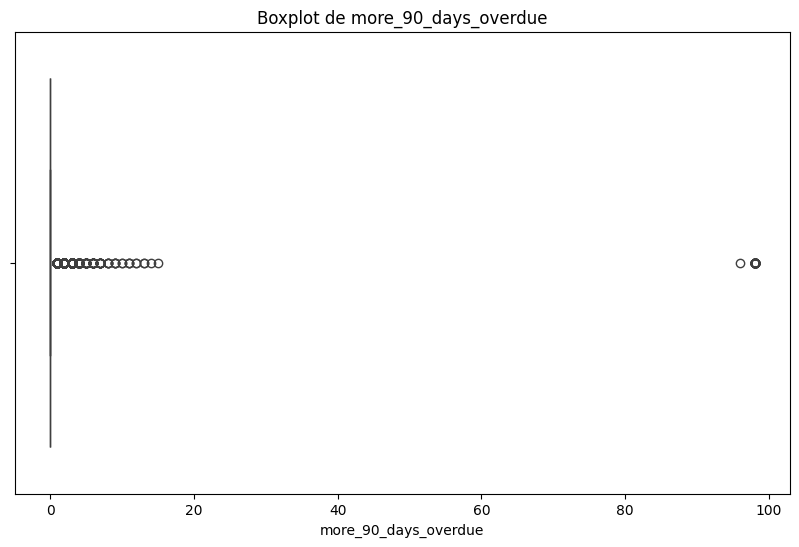

Usuarios con outliers en more_90_days_overdue:
       user_id  more_90_days_overdue
6            8                     1
10          14                     1
66          88                     2
148        204                     1
169        233                     2
...        ...                   ...
35995    31904                    98
35996    32628                    98
35997    33138                    98
35998    35172                    98
35999    35897                    98

[1946 rows x 2 columns]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un boxplot para la variable more_90_days_overdue
plt.figure(figsize=(10, 6))
sns.boxplot(x='more_90_days_overdue', data=df_relative_risk)
plt.title('Boxplot de more_90_days_overdue')
plt.show()

# Identificar usuarios con more_90_days_overdue como outliers
Q1 = df_relative_risk['more_90_days_overdue'].quantile(0.25)
Q3 = df_relative_risk['more_90_days_overdue'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = df_relative_risk[(df_relative_risk['more_90_days_overdue'] < lower_limit) | (df_relative_risk['more_90_days_overdue'] > upper_limit)]

# Mostrar los usuarios con valores atípicos
print("Usuarios con outliers en more_90_days_overdue:")
print(outliers[['user_id', 'more_90_days_overdue']])

In [ ]:
!pip install pandas
!pip install -U -q PyDrive

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
outliers.to_csv('/content/drive/My Drive/outliers_more_90_days_overdue.csv', index=False)

Mounted at /content/drive


## using_lines_not_secured_personal_assets

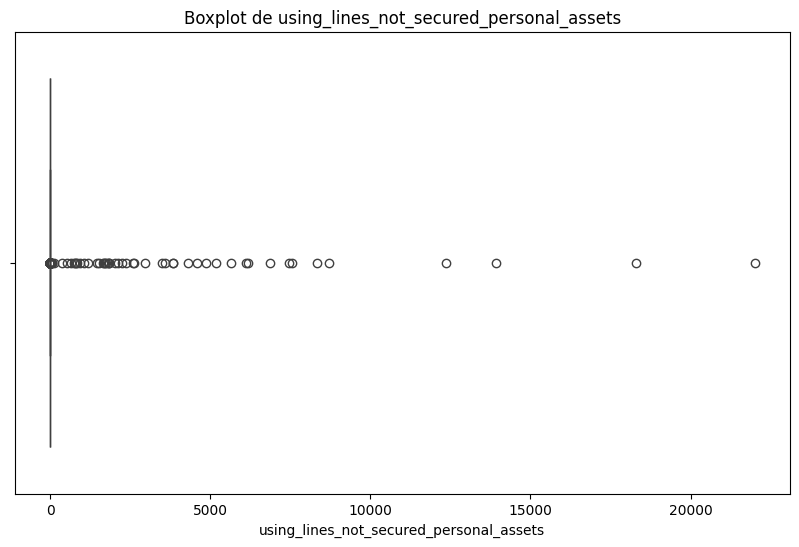

Usuarios con outliers en using_lines_not_secured_personal_assets:
       user_id  using_lines_not_secured_personal_assets
276        396                              5186.000000
359        506                               112.000000
983       1380                                 1.591362
1007      1410                              8710.000000
1300      1809                              2583.000000
...        ...                                      ...
30818    23805                                 1.390321
30859    33587                                 1.389513
30889     7187                                 1.613969
30890     7442                                 2.139535
30908    18644                                 1.389805

[177 rows x 2 columns]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un boxplot para la variable using_lines_not_secured_personal_assets
plt.figure(figsize=(10, 6))
sns.boxplot(x='using_lines_not_secured_personal_assets', data=df_relative_risk)
plt.title('Boxplot de using_lines_not_secured_personal_assets')
plt.show()

# Identificar usuarios con using_lines_not_secured_personal_assets como outliers
Q1 = df_relative_risk['using_lines_not_secured_personal_assets'].quantile(0.25)
Q3 = df_relative_risk['using_lines_not_secured_personal_assets'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = df_relative_risk[(df_relative_risk['using_lines_not_secured_personal_assets'] < lower_limit) | (df_relative_risk['using_lines_not_secured_personal_assets'] > upper_limit)]

# Mostrar los usuarios con valores atípicos
print("Usuarios con outliers en using_lines_not_secured_personal_assets:")
print(outliers[['user_id', 'using_lines_not_secured_personal_assets']])

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
outliers.to_csv('/content/drive/My Drive/outliers_using_lines_not_secured_personal_assets.csv', index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Exportar el DataFrame 'outliers' a un archivo CSV en Google Drive
outliers.to_csv('/content/drive/My Drive/outliers_using_lines_not_secured_personal_assets.csv', index=False)

## number_times_delayed_payment_loan_30_59_days

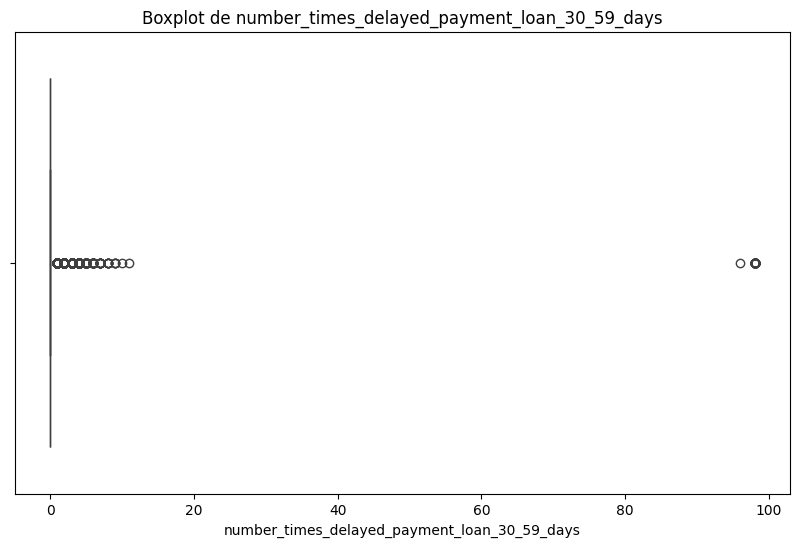

Usuarios con outliers en number_times_delayed_payment_loan_30_59_days:
       user_id  number_times_delayed_payment_loan_30_59_days
26059        9                                             1
26060       11                                             1
26061       15                                             1
26062       66                                             1
26063       69                                             1
...        ...                                           ...
35995    31904                                            98
35996    32628                                            98
35997    33138                                            98
35998    35172                                            98
35999    35897                                            98

[5812 rows x 2 columns]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un boxplot para la variable number_times_delayed_payment_loan_30_59_days
plt.figure(figsize=(10, 6))
sns.boxplot(x='number_times_delayed_payment_loan_30_59_days', data=df_relative_risk)
plt.title('Boxplot de number_times_delayed_payment_loan_30_59_days')
plt.show()

# Identificar usuarios con number_times_delayed_payment_loan_30_59_days como outliers
Q1 = df_relative_risk['number_times_delayed_payment_loan_30_59_days'].quantile(0.25)
Q3 = df_relative_risk['number_times_delayed_payment_loan_30_59_days'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = df_relative_risk[(df_relative_risk['number_times_delayed_payment_loan_30_59_days'] < lower_limit) | (df_relative_risk['number_times_delayed_payment_loan_30_59_days'] > upper_limit)]

# Mostrar los usuarios con valores atípicos
print("Usuarios con outliers en number_times_delayed_payment_loan_30_59_days:")
print(outliers[['user_id', 'number_times_delayed_payment_loan_30_59_days']])

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
outliers.to_csv('/content/drive/My Drive/outliers_number_times_delayed_payment_loan_30_59_days.csv', index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Exportar el DataFrame 'outliers' a un archivo CSV en Google Drive
outliers.to_csv('/content/drive/My Drive/outliers_number_times_delayed_payment_loan_30_59_days.csv', index=False)

## debt_ratio

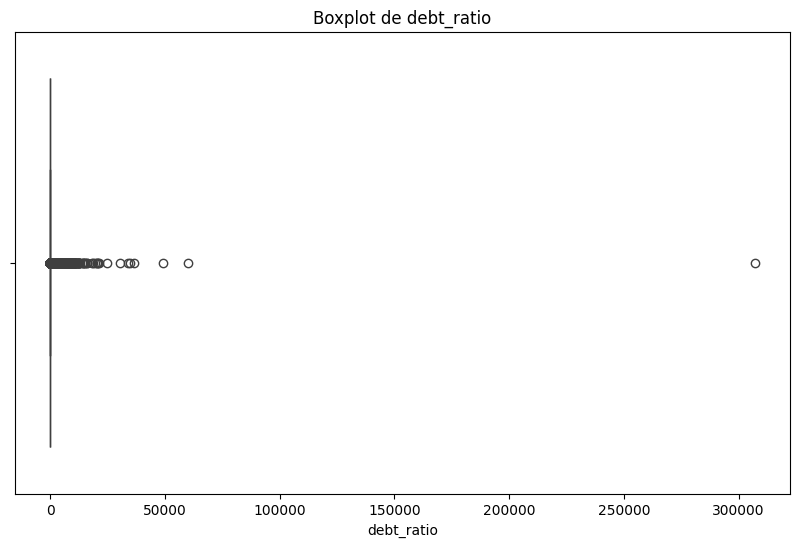

Usuarios con outliers en debt_ratio:
       user_id  debt_ratio
7           10    11.41791
8           12   859.00000
14          19  2610.00000
15          20  1546.00000
17          22  1477.00000
...        ...         ...
35974    22641    19.00000
35981    25244    54.00000
35982    25261    36.00000
35985    27163    49.00000
35999    35897     8.00000

[7579 rows x 2 columns]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un boxplot para la variable debt_ratio
plt.figure(figsize=(10, 6))
sns.boxplot(x='debt_ratio', data=df_relative_risk)
plt.title('Boxplot de debt_ratio')
plt.show()

# Identificar usuarios con debt_ratio como outliers
Q1 = df_relative_risk['debt_ratio'].quantile(0.25)
Q3 = df_relative_risk['debt_ratio'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = df_relative_risk[(df_relative_risk['debt_ratio'] < lower_limit) | (df_relative_risk['debt_ratio'] > upper_limit)]

# Mostrar los usuarios con valores atípicos
print("Usuarios con outliers en debt_ratio:")
print(outliers[['user_id', 'debt_ratio']])

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
outliers.to_csv('/content/drive/My Drive/outliers_debt_ratio.csv', index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Exportar el DataFrame 'outliers' a un archivo CSV en Google Drive
outliers.to_csv('/content/drive/My Drive/outliers_debt_ratio.csv', index=False)

Llamar datos user_ info

In [ ]:
import pandas as pd
from google.colab import auth
from google.cloud import bigquery
from IPython.display import display

# Autenticación con Google Cloud
auth.authenticate_user()

# Configurar el cliente de BigQuery
project_id = "proyecto03-408116"
client = bigquery.Client(project=project_id)

# Query para obtener datos de BigQuery
query_relative_risk = """
SELECT *
FROM `relative_risk.user_info`
"""

# Ejecutar la consulta y cargar los resultados en un DataFrame
df_relative_risk_user_info = client.query(query_relative_risk).to_dataframe()

# Mostrar la tabla
display(df_relative_risk_user_info)

,user_id,age,sex,last_month_salary,number_dependents
0,8870,21,F,NaN,<NA>
1,18876,21,F,NaN,<NA>
2,24483,21,M,NaN,<NA>
3,28075,21,M,NaN,<NA>
4,28122,21,M,NaN,<NA>
...,...,...,...,...,...
35995,12123,37,M,3300.0,9
35996,22582,48,M,16666.0,9
35997,34884,48,F,11400.0,9
35998,14692,47,M,9166.0,10


## last_month_salary

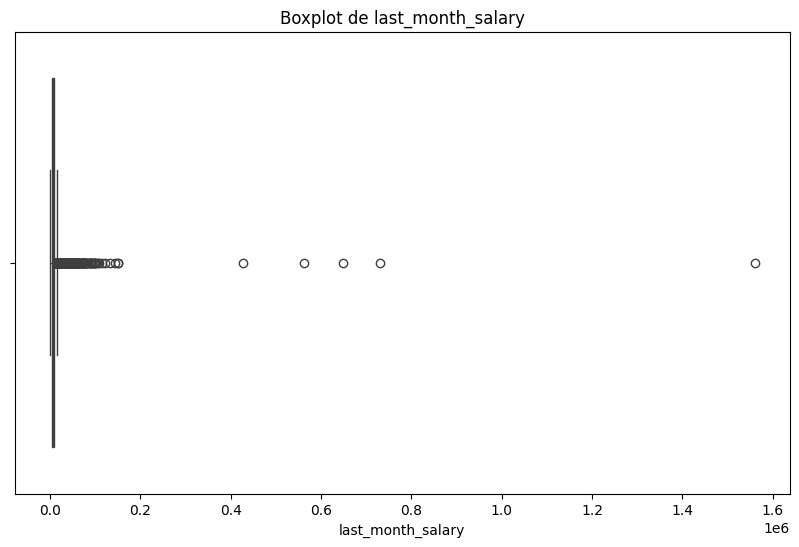

Usuarios con outliers en last_month_salary:
       user_id  last_month_salary
1608     12685            31250.0
2182     25184            16000.0
2448     22534            27600.0
2580      4860            36000.0
2605      7369            22000.0
...        ...                ...
35946    21457            16666.0
35962    16663            67000.0
35970    11782            19515.0
35981    20126            35000.0
35996    22582            16666.0

[1170 rows x 2 columns]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un boxplot para la variable last_month_salary
plt.figure(figsize=(10, 6))
sns.boxplot(x='last_month_salary', data=df_relative_risk_user_info)
plt.title('Boxplot de last_month_salary')
plt.show()

# Identificar usuarios con last_month_salary como outliers
Q1 = df_relative_risk_user_info['last_month_salary'].quantile(0.25)
Q3 = df_relative_risk_user_info['last_month_salary'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = df_relative_risk_user_info[(df_relative_risk_user_info['last_month_salary'] < lower_limit) | (df_relative_risk_user_info['last_month_salary'] > upper_limit)]

# Mostrar los usuarios con valores atípicos
print("Usuarios con outliers en last_month_salary:")
print(outliers[['user_id', 'last_month_salary']])

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
outliers.to_csv('/content/drive/My Drive/outliers_last_month_salary.csv', index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Exportar el DataFrame 'outliers' a un archivo CSV en Google Drive
outliers.to_csv('/content/drive/My Drive/outliers_last_month_salary.csv', index=False)

# Outliers - Histograma

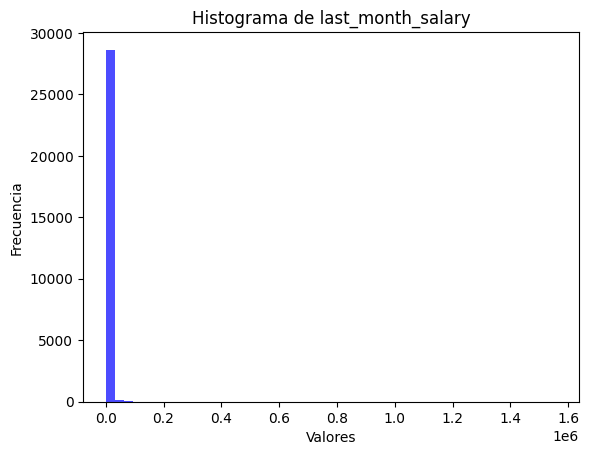

In [ ]:
import matplotlib.pyplot as plt

# Obtener la columna 'last_month_salary' del DataFrame
last_month_salary_data = df_relative_risk_user_info['last_month_salary'].to_numpy()

# Crear el histograma con un rango de bins más adecuado
plt.hist(last_month_salary_data, bins=50, color='blue', alpha=0.7)
plt.title('Histograma de last_month_salary')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()



In [ ]:
from scipy.stats import shapiro

# Obtener la columna 'last_month_salary' del DataFrame
last_month_salary_data = df_relative_risk_user_info['last_month_salary'].to_numpy()

# Realizar la prueba de Shapiro-Wilk
statistic, p_value = shapiro(last_month_salary_data)

# Imprimir los resultados
print(f'Estadístico de prueba: {statistic}, Valor p: {p_value}')

# Interpretar los resultados
alpha = 0.05
if p_value > alpha:
    print("No podemos rechazar la hipótesis nula. Los datos podrían seguir una distribución normal.")
else:
    print("Rechazamos la hipótesis nula. Los datos no siguen una distribución normal.")


Estadístico de prueba: nan, Valor p: 1.0
No podemos rechazar la hipótesis nula. Los datos podrían seguir una distribución normal.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
from scipy.stats import shapiro

# Obtener la columna 'last_month_salary' del DataFrame
last_month_salary_data = df_relative_risk_user_info['last_month_salary'].to_numpy()

# Realizar la prueba de Shapiro-Wilk
statistic, p_value = shapiro(last_month_salary_data)

# Imprimir los resultados
print(f'Estadístico de prueba: {statistic}, Valor p: {p_value}')

# Interpretar los resultados
alpha = 0.05
if p_value > alpha:
    print("No podemos rechazar la hipótesis nula. Los datos podrían seguir una distribución normal.")
else:
    print("Rechazamos la hipótesis nula. Los datos no siguen una distribución normal.")


Estadístico de prueba: nan, Valor p: 1.0
No podemos rechazar la hipótesis nula. Los datos podrían seguir una distribución normal.


In [ ]:
# Obtener el tipo de datos de la columna 'last_month_salary'
tipo_de_datos = df_relative_risk_user_info['last_month_salary'].dtype

# Imprimir el tipo de datos
print(f'Tipo de datos de la columna last_month_salary: {tipo_de_datos}')


Tipo de datos de la columna last_month_salary: float64


In [ ]:
# Redondear los valores y convertir la columna a formato entero
df_relative_risk_user_info['last_month_salary'] = df_relative_risk_user_info['last_month_salary'].round().astype('int64')


IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [ ]:
import numpy as np

# Tratar los valores no finitos (NaN o infinitos) asignándoles un valor específico (por ejemplo, 0)
df_relative_risk_user_info['last_month_salary'] = df_relative_risk_user_info['last_month_salary'].fillna(0)

# Redondear los valores y convertir la columna a formato entero
df_relative_risk_user_info['last_month_salary'] = df_relative_risk_user_info['last_month_salary'].round().astype('int64')

# Verificar el cambio
print(df_relative_risk_user_info['last_month_salary'].dtype)


int64


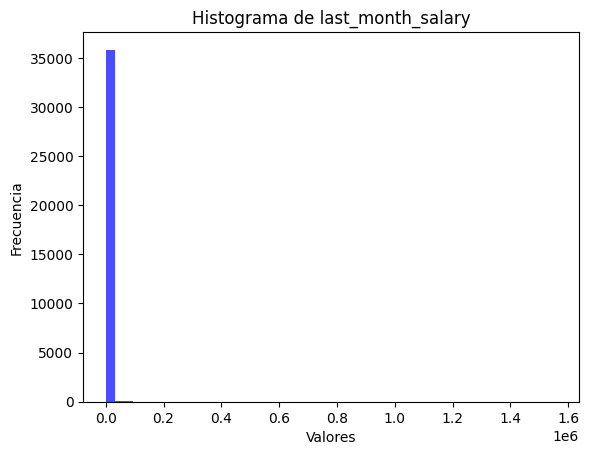

In [ ]:
import matplotlib.pyplot as plt

# Obtener la columna 'last_month_salary' del DataFrame
last_month_salary_data = df_relative_risk_user_info['last_month_salary'].to_numpy()

# Crear el histograma con un rango de bins más adecuado
plt.hist(last_month_salary_data, bins=50, color='blue', alpha=0.7)
plt.title('Histograma de last_month_salary')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()


In [ ]:
from scipy.stats import shapiro

# Obtener la columna 'last_month_salary' del DataFrame
last_month_salary_data = df_relative_risk_user_info['last_month_salary'].to_numpy()

# Realizar la prueba de Shapiro-Wilk
statistic, p_value = shapiro(last_month_salary_data)

# Imprimir los resultados
print(f'Estadístico de prueba: {statistic}, Valor p: {p_value}')

# Interpretar los resultados
alpha = 0.05
if p_value > alpha:
    print("No podemos rechazar la hipótesis nula. Los datos podrían seguir una distribución normal.")
else:
    print("Rechazamos la hipótesis nula. Los datos no siguen una distribución normal.")

Estadístico de prueba: 0.19510579109191895, Valor p: 0.0
Rechazamos la hipótesis nula. Los datos no siguen una distribución normal.


# Imputación datos

In [ ]:
import pandas as pd
from google.colab import auth
from google.cloud import bigquery
from IPython.display import display

# Autenticación con Google Cloud
auth.authenticate_user()

# Configurar el cliente de BigQuery
project_id = "proyecto03-408116"
client = bigquery.Client(project=project_id)

# Query para obtener datos de BigQuery
query_relative_risk_user_info_no_outliers = """
SELECT *
FROM `relative_risk.user_info_no_outliers`
"""

# Ejecutar la consulta y cargar los resultados en un DataFrame
df_relative_risk_user_info_no_outliers = client.query(query_relative_risk_user_info_no_outliers).to_dataframe()

# Mostrar la tabla
display(df_relative_risk_user_info_no_outliers)

,user_id,age,sex,number_dependents,last_month_salary_integer
0,18876,21,F,<NA>,<NA>
1,33474,21,M,<NA>,<NA>
2,24483,21,M,<NA>,<NA>
3,28122,21,M,<NA>,<NA>
4,8870,21,F,<NA>,<NA>
...,...,...,...,...,...
34825,13661,97,F,0,<NA>
34826,1276,98,F,0,<NA>
34827,6586,101,F,0,<NA>
34828,26810,103,F,0,<NA>


In [ ]:
# Imputación de valores nulos en last_month_salary_integer con el promedio
promedio_last_month_salary = df_relative_risk_user_info_no_outliers['last_month_salary_integer'].mean()
df_relative_risk_user_info_no_outliers['last_month_salary_integer'].fillna(promedio_last_month_salary, inplace=True)

# Mostrar la tabla después de la imputación
display(df_relative_risk_user_info_no_outliers)

,user_id,age,sex,number_dependents,last_month_salary_integer
0,18876,21,F,<NA>,<NA>
1,33474,21,M,<NA>,<NA>
2,24483,21,M,<NA>,<NA>
3,28122,21,M,<NA>,<NA>
4,8870,21,F,<NA>,<NA>
...,...,...,...,...,...
34825,13661,97,F,0,<NA>
34826,1276,98,F,0,<NA>
34827,6586,101,F,0,<NA>
34828,26810,103,F,0,<NA>


In [ ]:
pip install scikit-learn

In [ ]:
import pandas as pd
from google.colab import auth
from google.cloud import bigquery
from IPython.display import display
from sklearn.impute import SimpleImputer

# Autenticación con Google Cloud
auth.authenticate_user()

# Configurar el cliente de BigQuery
project_id = "proyecto03-408116"
client = bigquery.Client(project=project_id)

# Query para obtener datos de BigQuery
query_relative_risk_user_info_no_outliers = """
SELECT *
FROM `relative_risk.user_info_no_outliers`
"""

# Ejecutar la consulta y cargar los resultados en un DataFrame
df_relative_risk_user_info_no_outliers = client.query(query_relative_risk_user_info_no_outliers).to_dataframe()

# Imputación de valores nulos en last_month_salary_integer con el promedio
imputer = SimpleImputer(strategy='mean')
df_relative_risk_user_info_no_outliers['last_month_salary_integer'] = imputer.fit_transform(df_relative_risk_user_info_no_outliers[['last_month_salary_integer']])

# Mostrar la tabla después de la imputación
display(df_relative_risk_user_info_no_outliers)


,user_id,age,sex,number_dependents,last_month_salary_integer
0,18876,21,F,<NA>,NaN
1,33474,21,M,<NA>,NaN
2,24483,21,M,<NA>,NaN
3,28122,21,M,<NA>,NaN
4,8870,21,F,<NA>,NaN
...,...,...,...,...,...
34825,13661,97,F,0,NaN
34826,1276,98,F,0,NaN
34827,6586,101,F,0,NaN
34828,26810,103,F,0,NaN


In [ ]:
import pandas as pd
from google.colab import auth
from google.cloud import bigquery
from IPython.display import display

# Autenticación con Google Cloud
auth.authenticate_user()

# Configurar el cliente de BigQuery
project_id = "proyecto03-408116"
client = bigquery.Client(project=project_id)

# Query para obtener datos de BigQuery
query_relative_risk_user_info_no_outliers = """
SELECT *
FROM `relative_risk.user_info_no_outliers`
"""

# Ejecutar la consulta y cargar los resultados en un DataFrame
df_relative_risk_user_info_no_outliers = client.query(query_relative_risk_user_info_no_outliers).to_dataframe()

# Imputación de valores nulos en last_month_salary_integer con el promedio
promedio_last_month_salary = df_relative_risk_user_info_no_outliers['last_month_salary_integer'].mean()
df_relative_risk_user_info_no_outliers['last_month_salary_integer'].fillna(promedio_last_month_salary, inplace=True)

# Mostrar la tabla después de la imputación
display(df_relative_risk_user_info_no_outliers)


,user_id,age,sex,number_dependents,last_month_salary_integer
0,18876,21,F,<NA>,<NA>
1,33474,21,M,<NA>,<NA>
2,24483,21,M,<NA>,<NA>
3,28122,21,M,<NA>,<NA>
4,8870,21,F,<NA>,<NA>
...,...,...,...,...,...
34825,13661,97,F,0,<NA>
34826,1276,98,F,0,<NA>
34827,6586,101,F,0,<NA>
34828,26810,103,F,0,<NA>
